References
----------
[1] https://openstax.org/books/calculus-volume-1/pages/3-7-derivatives-of-inverse-functions
    
[2] Checkpoint 3.44
$$
\begin{equation}
s(t)=\sqrt{2t+1}
\end{equation}
$$

SymPy version: 1.13.2
NumPy version: 1.26.4
Matplotlib version: 3.9.2

Lambda(x, sqrt(2*x + 1))
x:[ 0.    0.55  1.1   1.65  2.2   2.75  3.3   3.85  4.4   4.95  5.5   6.05
  6.6   7.15  7.7   8.25  8.8   9.35  9.9  10.45 11.  ]
y:[1, 1.44913767461894, 1.78885438199983, 2.07364413533277, 2.32379000772445, 2.54950975679639, 2.75680975041804, 2.94957624075053, 3.13049516849971, 3.30151480384384, 3.46410161513775, 3.61939221417077, 3.76828873628335, 3.91152144312159, 4.04969134626332, 4.18330013267038, 4.31277173056957, 4.43846820423443, 4.56070170039655, 4.67974358271904, 4.79583152331272]
f′(x)=1/sqrt(2*x + 1)
f′(2)=0.447213595499958
y_tangent:[1.34164078649987 1.58760826402485 1.83357574154983 2.07954321907480
 2.32551069659978 2.57147817412476 2.81744565164974 3.06341312917471
 3.30938060669969 3.55534808422467 3.80131556174964 4.04728303927462
 4.29325051679960 4.53921799432457 4.78518547184955 5.03115294937453
 5.27712042689950 5.52308790442448 5.76905538194946 6.01502285947443
 6.260

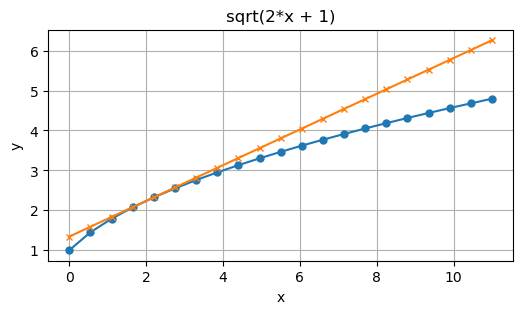

In [7]:
import sympy as sp
from sympy.abc import x
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

print(f"SymPy version: {sp.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print()

f = sp.Lambda(x, sp.sqrt(2 * x + 1))
print(f)

x_values = np.linspace(0, 11, 21)
print(f"x:{x_values}")


def map_x_values(x_value):
    result = f(x_value)
    if result == sp.zoo:
        return np.inf
    return result


y_values = list(map(map_x_values, x_values))
print(f"y:{y_values}")

f_prime = sp.diff(f(x), x)
print(f"f′(x)={f_prime}")

x_at = 2


def calculate_slope(derivative_fn, derivative_order=1):
    slope = derivative_fn.subs(x, x_at).evalf()
    apostrophe = "′" * derivative_order
    print(f"f{apostrophe}({x_at})={slope}")
    y_tangent = slope * (x_values - x_at) + f(x_at).evalf()
    print(f"y_tangent:{y_tangent}")
    return slope, y_tangent


slope, y_tangent = calculate_slope(f_prime)

figure, axes = plt.subplots(figsize=(6, 3))
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title(f.expr)
axes.grid()
axes.plot(x_values, y_values, marker="o", markersize=5, label="f′")
axes.plot(x_values, y_tangent, marker="x", markersize=5, label="f′′")
plt.show()